# <font color='BLACK' >SCRAPING REAL ESTATE PROPERTIES FROM [PRIVATE PROPERTY](privateproperty.com.ng) WEBSITE AND CREATING VISUALIZATIONS.<font/>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://www.privateproperty.com.ng/property-for-rent?page="

In [3]:
s = requests.Session()
r = s.get(url,timeout=10)
r

<Response [200]>

In [4]:
c = r.content

In [5]:
soup = BeautifulSoup(c, 'html.parser')

In [59]:
view = soup.prettify()

In [7]:
soup.title.string

'Property for Rent in Nigeria | Private Property'

In [8]:
prop_title = soup.find_all('h2', {'class':'property-title'})
prop_title[0].get_text().strip()

'Neat and Spacious 3 Bedroom Flat in a Block of Flats'

In [9]:
prop_title_default = soup.find_all('div', {'class':'property-title-default'})
prop_title_default[0].get_text().strip()

'3 Bedroom Flat & Apartment'

In [10]:
location = soup.find_all('div', {'class':'property-location overflow-ellipse-mobile'})
location[0].get_text().strip()

'Pearl Apartments Abeokuta Street , Ebute Metta'

In [11]:
beds = soup.find_all('span',{'class':'h-beds'})
beds[0].get_text().strip()

'3'

In [12]:
baths = soup.find_all('span',{'class':'h-baths'})
baths[0].get_text().strip()

'3'

In [13]:
garage = soup.find_all('span',{'class':'h-garage'})
garage[0].get_text().strip()

'2'

In [14]:
# The number of lisitngs for rent
soup.find_all('div',{'class':'listing-count'})[0].get_text().strip().split()[-1]

'2863'

In [15]:
# to get the number of pages on the website
items = int(soup.find_all('div',{'class':'listing-count'})[0].get_text().strip().split()[-1])
listings = 25
page_nr = int(items/listings)
page_nr

114

In [18]:
l=[]

base_url="https://www.privateproperty.com.ng/property-for-rent?page="

items = int(soup.find_all('div',{'class':'listing-count'})[0].get_text().strip().split()[-1])
listings = 25
page_nr = int(items/listings)

for page in range(1,int(page_nr),1):
    print(base_url+str(page))
    r= requests.get(base_url+str(page))
    c= r.content
    soup= BeautifulSoup(c,"html.parser")
        
    classes = ["item-body table-cell"]
    for class_ in classes:
        real=soup.find_all("div",{"class":class_})

        for i in list(range(0,len(real))):
            d={}
            d["page" ] = page
            try:
                d["title"]=real[i].find('h2', {'class':'property-title'}).get_text().strip()
            except (IndexError,TypeError,AttributeError) as e:
                d["title"]= None
            try:
                d["description"]=real[i].find('div', {'class':'property-title-default'}).get_text().strip()
            except (IndexError,TypeError,AttributeError) as e:
                d["description"]= None
            try:
                d["bedrooms"]= real[i].find('span',{'class':'h-beds'}).get_text().strip()
            except (IndexError,TypeError,AttributeError) as e:
                d["bedrooms"]= None 
            try:
                d["bathrooms"]= real[i].find('span',{'class':'h-baths'}).get_text().strip()
            except (IndexError,TypeError,AttributeError) as e:
                d["bathrooms"]= None
            try:
                d["garage"] = real[i].find('span',{'class':'h-garage'}).get_text().strip()
            except (IndexError,TypeError,AttributeError) as e:
                d["garage"] = None
            try:
                d["location"] = real[i].find('div', {'class':'property-location overflow-ellipse-mobile'}).get_text().strip()
            except (IndexError,TypeError,AttributeError):
                d["location"] = None
            try:
                d["location_s"] = real[i].find('div', {'class':'property-location overflow-ellipse-mobile'}).get_text().strip().split()[-1]
            except(IndexError,TypeError,AttributeError):
                d['location_s'] = None
            try:
                d["price"]=real[i].find('div', {'class':'info-row price'}).get_text().strip().split()[0]
            except (IndexError,TypeError,AttributeError) as e:
                d["price"] = None            
            l.append(d)
            #print(l)

https://www.privateproperty.com.ng/property-for-rent?page=1
https://www.privateproperty.com.ng/property-for-rent?page=2
https://www.privateproperty.com.ng/property-for-rent?page=3
https://www.privateproperty.com.ng/property-for-rent?page=4
https://www.privateproperty.com.ng/property-for-rent?page=5
https://www.privateproperty.com.ng/property-for-rent?page=6
https://www.privateproperty.com.ng/property-for-rent?page=7
https://www.privateproperty.com.ng/property-for-rent?page=8
https://www.privateproperty.com.ng/property-for-rent?page=9
https://www.privateproperty.com.ng/property-for-rent?page=10
https://www.privateproperty.com.ng/property-for-rent?page=11
https://www.privateproperty.com.ng/property-for-rent?page=12
https://www.privateproperty.com.ng/property-for-rent?page=13
https://www.privateproperty.com.ng/property-for-rent?page=14
https://www.privateproperty.com.ng/property-for-rent?page=15
https://www.privateproperty.com.ng/property-for-rent?page=16
https://www.privateproperty.com.n

In [19]:
import pandas as pd
df = pd.DataFrame(l)
df.head(5)

,page,title,description,bedrooms,bathrooms,garage,location,location_s,price
0,1,Neat and Spacious 3 Bedroom Flat in a Block of...,3 Bedroom Flat & Apartment,3,3,None,"Pearl Apartments Abeokuta Street , Ebute Metta",Metta,"N1,600,000"
1,1,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,None,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,"N7,500,000"
2,1,2 Bedroom Flat,2 Bedroom Flat & Apartment,2,2,None,"Riverview Estate Isheri North Ojodu, Ojodu, Ikeja",Ikeja,"N600,000"
3,1,Burdillon 4 bedroom Apartment,3 Bedroom Flat & Apartment,3,4,None,"Burdillon , Ikoyi",Ikoyi,"N29,000,000"
4,1,Lovely 3 Bedroom Flats,3 Bedroom Flat & Apartment,3,3,None,"Bourdillon Road, Ikoyi",Ikoyi,"N6,000,000"


In [20]:
df[df.duplicated()]

,page,title,description,bedrooms,bathrooms,garage,location,location_s,price
69,3,4 bedroom semi detached duplex with a room bq,4 Bedroom Duplex,4,4,None,"Chevron, Chevron Drive, Lekki",Lekki,"N4,500,000"
71,3,4 bedroom semi-detached duplex with a room bq,4 Bedroom Duplex,4,4,None,"Orchid, Ikota, Lekki",Lekki,"N5,200,000"
73,3,4 bedroom semi-detached duplex with a room bq,4 Bedroom Duplex,4,4,None,"Orchid, Ikota, Lekki",Lekki,"N4,500,000"
74,3,4 bedroom semi-detached duplex with a room bq,4 Bedroom Duplex,4,4,None,"Orchid, Ikota, Lekki",Lekki,"N4,500,000"
378,16,Luxury 4 bedroom semi detached duplex with bq,4 Bedroom Duplex,4,4,3,"Orchid , Ikota, Lekki",Lekki,"N5,000,000"
1207,49,4 bedroom terraced duplex,4 Bedroom Terrace,4,4,None,"Orchid, Ikota, Lekki",Lekki,"N4,500,000"
1215,49,4 bedroom Terraced duplex for rent,4 Bedroom Terrace,4,4,None,"Orchid, Ikota, Lekki",Lekki,"N4,500,000"
1541,62,Lovely 4 Bedroom Semi Detached Duplex,4 Bedroom Duplex,4,4,None,"Chevron, Chevron Drive, Lekki",Lekki,"N3,500,000"
1878,76,Four bedroom semi-detached duplex for rent,4 Bedroom Duplex,4,4,3,"Ikota, Lekki",Lekki,"N4,500,000"
2117,85,4 bedroom semi detached duplex,4 Bedroom Duplex,4,4,None,"Orchid , Ikota, Lekki",Lekki,"N3,500,000"


In [21]:
df.drop_duplicates()

,page,title,description,bedrooms,bathrooms,garage,location,location_s,price
0,1,Neat and Spacious 3 Bedroom Flat in a Block of...,3 Bedroom Flat & Apartment,3,3,None,"Pearl Apartments Abeokuta Street , Ebute Metta",Metta,"N1,600,000"
1,1,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,None,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,"N7,500,000"
2,1,2 Bedroom Flat,2 Bedroom Flat & Apartment,2,2,None,"Riverview Estate Isheri North Ojodu, Ojodu, Ikeja",Ikeja,"N600,000"
3,1,Burdillon 4 bedroom Apartment,3 Bedroom Flat & Apartment,3,4,None,"Burdillon , Ikoyi",Ikoyi,"N29,000,000"
4,1,Lovely 3 Bedroom Flats,3 Bedroom Flat & Apartment,3,3,None,"Bourdillon Road, Ikoyi",Ikoyi,"N6,000,000"
...,...,...,...,...,...,...,...,...,...
2820,113,Self contain with a sizeable Kitchen and bath...,Flat & Apartment,1,1,None,"35 Road, Gwarimpa, Abuja Phase 3",3,"N400,000"
2821,113,1 Bedroom (Ensuite) Flat @ Lekki Phase One (Ri...,Flat & Apartment,1,2,None,"Lekki Phase One, Right Side, Lekki Phase 1, Lekki",Lekki,"N1,500,000"
2822,113,2 Bedroom Terrace,2 Bedroom Townhouse,2,2,None,"Mercury Icon Luxury Homes, Katampe Main, Abuja...",2,"N5,000,000"
2823,113,Mercury Icon Luxury Homes,2 Bedroom Flat & Apartment,2,3,None,"Katampe Main, Abuja Phase 2",2,"N2,500,000"


In [22]:
df.head()

,page,title,description,bedrooms,bathrooms,garage,location,location_s,price
0,1,Neat and Spacious 3 Bedroom Flat in a Block of...,3 Bedroom Flat & Apartment,3,3,None,"Pearl Apartments Abeokuta Street , Ebute Metta",Metta,"N1,600,000"
1,1,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,None,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,"N7,500,000"
2,1,2 Bedroom Flat,2 Bedroom Flat & Apartment,2,2,None,"Riverview Estate Isheri North Ojodu, Ojodu, Ikeja",Ikeja,"N600,000"
3,1,Burdillon 4 bedroom Apartment,3 Bedroom Flat & Apartment,3,4,None,"Burdillon , Ikoyi",Ikoyi,"N29,000,000"
4,1,Lovely 3 Bedroom Flats,3 Bedroom Flat & Apartment,3,3,None,"Bourdillon Road, Ikoyi",Ikoyi,"N6,000,000"


In [23]:
df.columns

Index(['page', 'title', 'description', 'bedrooms', 'bathrooms', 'garage',
       'location', 'location_s', 'price'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 9 columns):
page           2825 non-null int64
title          2825 non-null object
description    2825 non-null object
bedrooms       2516 non-null object
bathrooms      2513 non-null object
garage         542 non-null object
location       2825 non-null object
location_s     2825 non-null object
price          2821 non-null object
dtypes: int64(1), object(8)
memory usage: 198.8+ KB


## Data Cleaning

In [25]:
df.rename(columns={'title':'description',
                   'description':'title',
                   'location_s':'city'}, inplace=True)

In [26]:
df.columns

Index(['page', 'description', 'title', 'bedrooms', 'bathrooms', 'garage',
       'location', 'city', 'price'],
      dtype='object')

In [27]:
df.head()

,page,description,title,bedrooms,bathrooms,garage,location,city,price
0,1,Neat and Spacious 3 Bedroom Flat in a Block of...,3 Bedroom Flat & Apartment,3,3,None,"Pearl Apartments Abeokuta Street , Ebute Metta",Metta,"N1,600,000"
1,1,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,None,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,"N7,500,000"
2,1,2 Bedroom Flat,2 Bedroom Flat & Apartment,2,2,None,"Riverview Estate Isheri North Ojodu, Ojodu, Ikeja",Ikeja,"N600,000"
3,1,Burdillon 4 bedroom Apartment,3 Bedroom Flat & Apartment,3,4,None,"Burdillon , Ikoyi",Ikoyi,"N29,000,000"
4,1,Lovely 3 Bedroom Flats,3 Bedroom Flat & Apartment,3,3,None,"Bourdillon Road, Ikoyi",Ikoyi,"N6,000,000"


In [28]:
df['title'][2].split()[-1]

'Apartment'

In [29]:
df['type'] = df['title'].apply(lambda x:x.split()[-1])

In [30]:
df['type'].unique()

array(['Apartment', 'House', 'Terrace', 'Duplex', 'Office', 'Property',
       'Warehouse', 'Townhouse', 'Bungalow', 'Shop', 'Hotel', 'Quarter',
       'Land'], dtype=object)

**Let's performing some cleaning on the city column**

In [31]:
df['city'].unique()

array(['Metta', 'Ikeja', 'Ikoyi', 'Island', 'Lekki', 'Ajah', 'Yaba',
       'Extension', 'Ibadan', '3', 'Ketu', 'Oshodi', '2', 'Isolo',
       'Festac', 'Road', 'Gbagada', 'Agege', 'Surulere', 'area', '1', '4',
       'Apapa', 'Mushin', 'Harcourt'], dtype=object)

In [32]:
df[(df['city']=='2') | (df['city']=='3') | (df['city']=='1') | (df['city']=='4')]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
280,12,A Clean and Greeny 5 Bedroom with BQ,5 Bedroom Duplex,5,6,None,"Gwarinpa, Gwarimpa, Abuja Phase 3",3,"N5,500,000",Duplex
841,34,Fully Equipped and Furnished Ultramodern Vehic...,Shop,None,None,None,"Katampe Main, Abuja Phase 2",2,"N60,000,000",Shop
1043,42,A Tastefully built and fully furnished 4bedroo...,4 Bedroom House,4,4,None,"Earth Point, Life Camp, Abuja Phase 3",3,"N15,000,000",House
1045,42,A luxury 4Bedrooms semi-detached Duplex with 2...,4 Bedroom Duplex,4,4,None,"Hill Side Estate, Gwarimpa, Abuja Phase 3",3,"N4,500,000",Duplex
1068,43,Newly Built 4 Bedroom Terrace at Mercury Icon ...,4 Bedroom Terrace,4,5,None,"Mercury Icon Luxury Homes, Katampe Main, Abuja...",2,"N11,000,000",Terrace
...,...,...,...,...,...,...,...,...,...,...
2819,113,2Bedrooms Bungalow at Gwarinpa,2 Bedroom Bungalow,2,2,None,"35 Road, Gwarimpa, Abuja Phase 3",3,"N1,000,000",Bungalow
2820,113,Self contain with a sizeable Kitchen and bath...,Flat & Apartment,1,1,None,"35 Road, Gwarimpa, Abuja Phase 3",3,"N400,000",Apartment
2822,113,2 Bedroom Terrace,2 Bedroom Townhouse,2,2,None,"Mercury Icon Luxury Homes, Katampe Main, Abuja...",2,"N5,000,000",Townhouse
2823,113,Mercury Icon Luxury Homes,2 Bedroom Flat & Apartment,2,3,None,"Katampe Main, Abuja Phase 2",2,"N2,500,000",Apartment


In [33]:
df['city'].replace('1', 'Abuja', inplace=True)
df['city'].replace('2', 'Abuja', inplace=True)
df['city'].replace('3', 'Abuja', inplace=True)
df['city'].replace('4', 'Abuja', inplace=True)

In [34]:
df[df['city']=='Island'].head()

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
20,1,&180 Square Meters Office In a High Rise Building,Office,None,None,None,"Churchgate Street , Victoria Island",Island,"N16,500,000",Office
21,1,3 BEDROOM LUXURY APARTMENT with COMMUNAL POOL ...,3 Bedroom Flat & Apartment,3,3,None,Victoria Island,Island,"N11,000,000",Apartment
29,2,Spacious and Elegantly Finished Fully Serviced...,3 Bedroom Flat & Apartment,3,3,None,"Oniru, Victoria Island",Island,"N5,000,000",Apartment
90,4,For Rent in Victoria Island : 3 bed Maisonettes,3 Bedroom Flat & Apartment,3,4,None,"Off Adeola Odeku, Victoria Island",Island,"N7,500,000",Apartment
131,6,Luxury 3 bedroom massionette with swimming pool,3 Bedroom House,3,4,None,"Off Ahmadu Bello Way , Victoria Island",Island,"N12,000,000",House


In [35]:
df['city'].replace('Island', 'Victoria Island', inplace=True)

In [36]:
df[df['city']=='Extension']

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
67,3,"Standard Warehouse Facility measuring 1,000sqm...",Commercial Property,None,None,None,Magboro Bus Stop Along Lagos Ibadan Express Wa...,Extension,"N14,000,000",Property
156,7,Neatly Used 3 Bedroom Apartment,3 Bedroom Flat & Apartment,3,3,3,"Olowotedo, Magboro, Lagos Extension",Extension,"N500,000",Apartment
1230,50,Well Maintained 2 Bedroom Flat Opposite MFM Pr...,2 Bedroom Flat & Apartment,2,2,None,"Gateway Development Estate, Magboro, Lagos Ext...",Extension,"N400,000",Apartment
1944,78,Neatly Used 2 Bedroom Apartment,2 Bedroom Flat & Apartment,2,2,None,"Olowotedo, Magboro, Lagos Extension",Extension,"N400,000",Apartment
2781,112,Warehouse for lease,Warehouse,None,None,None,"Magboro, Lagos Extension",Extension,None,Warehouse


In [37]:
df['city'].replace('Extension', 'Lagos Extension', inplace=True)

In [38]:
df[df['city']=='Road']

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
1062,43,4 units of 2 bedrooms apartments with a B/Q,2 Bedroom Commercial Property,2,2,None,"Olorunlogbon, Anthony, Ikorodu Road",Road,"N2,000,000",Property
1183,48,Newly Built Open Plan Offices,Office,None,None,None,"Sylvia Cresent , Anthony, Ikorodu Road",Road,"N25,200,000",Office
1196,48,Office Space,Office,None,None,None,"Off Folarin Street, Jibowu, Ikorodu Road",Road,"N2,500,000",Office
1672,67,6 Numbers Newly Built 3 Bedrooms Flat With All...,3 Bedroom Flat & Apartment,3,3,None,"Anthony, Ikorodu Road",Road,"N2,500,000",Apartment
1771,71,Newly Renovated 3 Bed Room Flat,3 Bedroom Flat & Apartment,3,3,None,"Awofeso , Shomolu, Ikorodu Road",Road,"N800,000",Apartment
1828,74,"10,000 Square Feet Warehouse with Outdoor Spac...",Warehouse,None,None,None,"Charley Boy, Anthony, Ikorodu Road",Road,"N30,000,000",Warehouse


In [39]:
df['city'].replace('Road','Ikorodu Road',inplace=True)

In [40]:
df[df['city']=='area']

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
1171,47,"15,000 Square Feet Warehouse For Lease",Warehouse,None,None,None,"Lagos/Ibadan, Ibafo, Ogun area",area,"N15,000,000",Warehouse


In [41]:
df['city'].replace('area','Ogun',inplace=True)

In [42]:
df[df['city']=='Harcourt']

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
2635,106,135 rooms hotel for lease at Port Harcourt,Hotel,None,None,None,"206 B Phase 2, Block C, Off Ordinance Road, Tr...",Harcourt,"N120,000,000",Hotel


In [43]:
df['city'].replace('Harcourt','Port Harcourt',inplace=True)

In [44]:
df['city'].unique()

array(['Metta', 'Ikeja', 'Ikoyi', 'Victoria Island', 'Lekki', 'Ajah',
       'Yaba', 'Lagos Extension', 'Ibadan', 'Abuja', 'Ketu', 'Oshodi',
       'Isolo', 'Festac', 'Ikorodu Road', 'Gbagada', 'Agege', 'Surulere',
       'Ogun', 'Apapa', 'Mushin', 'Port Harcourt'], dtype=object)

In [45]:
# Check for missing values
missing_values = df.isnull()
for cols in missing_values.columns.tolist():
    print(cols)
    print(missing_values[cols].value_counts())
    print()

page
False    2825
Name: page, dtype: int64

description
False    2825
Name: description, dtype: int64

title
False    2825
Name: title, dtype: int64

bedrooms
False    2516
True      309
Name: bedrooms, dtype: int64

bathrooms
False    2513
True      312
Name: bathrooms, dtype: int64

garage
True     2283
False     542
Name: garage, dtype: int64

location
False    2825
Name: location, dtype: int64

city
False    2825
Name: city, dtype: int64

price
False    2821
True        4
Name: price, dtype: int64

type
False    2825
Name: type, dtype: int64



In [46]:
df[df['price'].isnull()]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
1904,77,Lovely 4bedroom apartment available for rent w...,4 Bedroom Duplex,4,4,3,"Off Ademola Adetokunbo , Victoria Island",Victoria Island,None,Duplex
2781,112,Warehouse for lease,Warehouse,None,None,None,"Magboro, Lagos Extension",Lagos Extension,None,Warehouse
2782,112,2 hectares of estate development at lugbe i ex...,Land,None,None,None,"Lugbe 1 Extension, River Park Estate, Lugbe, ...",Abuja,None,Land
2783,112,Plot Ed105 Of 5 Hectares Of Estate Development...,Land,None,None,None,"Lugbe 1 Extension, Lugbe, Abuja Phase 4",Abuja,None,Land


In [47]:
# Create a new dataframe for bedrooms with null values
null = df[(df['bedrooms'].isnull())]

In [48]:
null.head(10)

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
20,1,&180 Square Meters Office In a High Rise Building,Office,None,None,None,"Churchgate Street , Victoria Island",Victoria Island,"N16,500,000",Office
22,1,Newly Built Commercial Building of 180 Square ...,Office,None,None,None,"Off Admiralty Way, Lekki Phase 1, Lekki",Lekki,"N11,700,000",Office
67,3,"Standard Warehouse Facility measuring 1,000sqm...",Commercial Property,None,None,None,Magboro Bus Stop Along Lagos Ibadan Express Wa...,Lagos Extension,"N14,000,000",Property
108,5,3 bays large warehouse facility measuring 3000...,Warehouse,None,None,None,"Wempco, Road, Ogba, Ikeja",Ikeja,"N60,000,000",Warehouse
416,17,Fully Furnished Duplex for Office at Lekki Pha...,Office,None,None,None,"Off Freedom Way, Lekki Phase 1, Lekki",Lekki,"N15,000,000",Office
469,19,4 bedroom semi detached duplex with a room bq,Commercial Property,None,None,None,"Ikota, Lekki",Lekki,"N6,000,000",Property
557,23,Direct Cash Ready Clients Only - Newly Built &...,Office,None,None,None,"Awolowo Road Ikoyi, Awolowo Road, Ikoyi",Ikoyi,"N80,000",Office
595,24,Shop Space in Victoria Island,Shop,None,None,None,"Murphy's Plaza, Victoria Island",Victoria Island,"N1,260,000",Shop
596,24,Shop Space In Vi,Shop,None,None,None,"Murphy's Plaza, Sanusi Fafunwa Street, Victori...",Victoria Island,"N1,648,800",Shop
599,24,Shop Space In Victoria Island,Shop,None,None,None,"Murphy's Plaza, Sanusi Fafunwa Street, Victori...",Victoria Island,"N1,621,800",Shop


In [49]:
null['type'].unique()

array(['Office', 'Property', 'Warehouse', 'Shop', 'Hotel', 'Quarter',
       'Land'], dtype=object)

### There're  a lot of null values in the bedrooms, bathrooms and garage columns. If we check the type of the 
### property for rent, we would notice that these are structures or buildings that probably won't have these 
### features listed on the website. Such as Offices, warehouses, lands, shops and so on.

### So therefore, we won't be dropping the nulls values for these columns.

In [50]:
df['price'].dropna(inplace=True)

In [51]:
# Cleaning the string so we can easily convert to integers
df['price'] = df['price'].apply(lambda x:x.replace(',','').replace('N',''))

In [52]:
df['price']

0        1600000
1        7500000
2         600000
3       29000000
4        6000000
          ...   
2820      400000
2821     1500000
2822     5000000
2823     2500000
2824     5000000
Name: price, Length: 2825, dtype: object

In [53]:
df['price'].isnull().sum()

4

In [54]:
# Filling all NaN values with zero
df.fillna(0,inplace=True)

In [55]:
# Converting the price columns to intergers
df['price'] = pd.to_numeric(df['price'])

In [56]:
# Converting from float to integers
df['bedrooms'] = df['bedrooms'].astype('int')
df['bathrooms'] = df['bathrooms'].astype('int')
df['garage'] = df['garage'].astype('int')

In [57]:
df.head()

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
0,1,Neat and Spacious 3 Bedroom Flat in a Block of...,3 Bedroom Flat & Apartment,3,3,0,"Pearl Apartments Abeokuta Street , Ebute Metta",Metta,1600000,Apartment
1,1,5 Bedrooms Detached House + 1 Room BQ,5 Bedroom House,5,5,0,"Joel Ogunnaike Street Gra, Ikeja , Ikeja",Ikeja,7500000,House
2,1,2 Bedroom Flat,2 Bedroom Flat & Apartment,2,2,0,"Riverview Estate Isheri North Ojodu, Ojodu, Ikeja",Ikeja,600000,Apartment
3,1,Burdillon 4 bedroom Apartment,3 Bedroom Flat & Apartment,3,4,0,"Burdillon , Ikoyi",Ikoyi,29000000,Apartment
4,1,Lovely 3 Bedroom Flats,3 Bedroom Flat & Apartment,3,3,0,"Bourdillon Road, Ikoyi",Ikoyi,6000000,Apartment


### Data has been thoroughly cleaned and data types corrected. We can save the data now.

In [58]:
df.to_csv('House for rent.csv', index=False)

## Data Visualization

### The following questions will be answered using seaborn
> 1. Cities with more properties availabe for rentage
> 2. cities with average highest rentage prices
> 3. Average Prices for Types of Buildings
> 4. how number of bedrooms affect property prices

In [60]:
# Create a function that plots a barplot
def BarPlot(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(20,10))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='viridis')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),
                        ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=10)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [61]:
# Create a function that plots a barplot
def BarPlot2(data, x, y, title):
    
    data = data
    col1 = x
    col2 = y
        
    fig = plt.figure(figsize=(20,10))
    ax = sns.barplot(x=data[col1], y=data[col2], palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
    for p in ax.patches:
        ax.annotate(format(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),
                        ha='center',va='center',xytext=(0,10),textcoords='offset points',fontsize=10,rotation=-5)
    plt.title(title,fontsize=16,weight='bold')
    plt.xlabel(col1,fontsize=12)
    plt.ylabel(col2,fontsize=12)

In [62]:
# Create a count plot
def CountPlot(data, y, title):
    
    data = data
    col = y
    
    
    fig = plt.figure(figsize=(12,10))
    ax = sns.countplot(y=data[col],
                  order=data[col].value_counts().index,
                  lw=1,
                  palette='summer',
                  edgecolor='k'*data[col].nunique()
                  )
    for x,y in enumerate(data[col].value_counts()):
        ax.text(15,x,y,weight='bold',color='white',fontsize=10,bbox=dict(pad=3.0,facecolor='black', alpha=0.5))
    plt.title(title,fontsize=16,weight='bold')

## Cities with more properties availabe for rentage

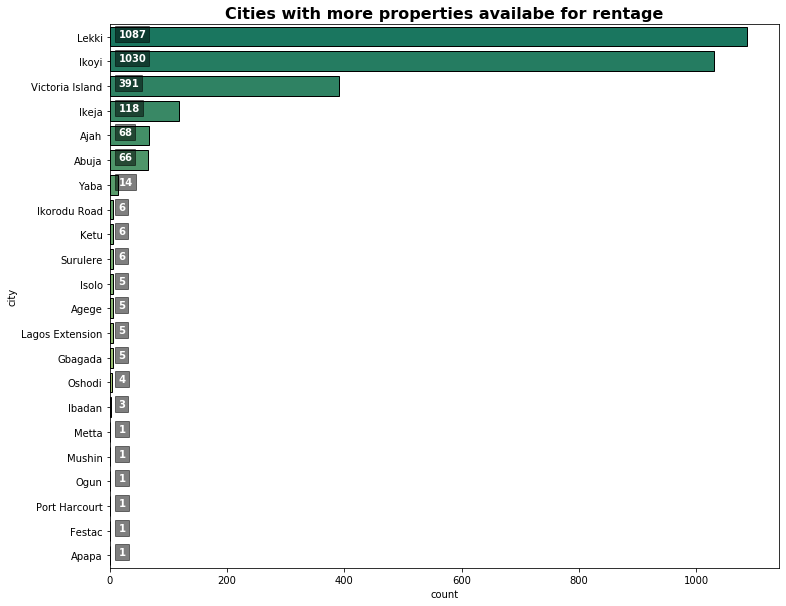

In [63]:
CountPlot(df, 'city', 'Cities with more properties availabe for rentage')

## Cities with average highest rentage prices

In [64]:
city_avg_price = df.groupby('city')['price'].mean().astype('int').reset_index()
city_avg_price

,city,price
0,Abuja,8542002
1,Agege,820000
2,Ajah,28842386
3,Apapa,12000
4,Festac,5100000
5,Gbagada,2420000
6,Ibadan,2050000
7,Ikeja,13395135
8,Ikorodu Road,10500000
9,Ikoyi,14921980


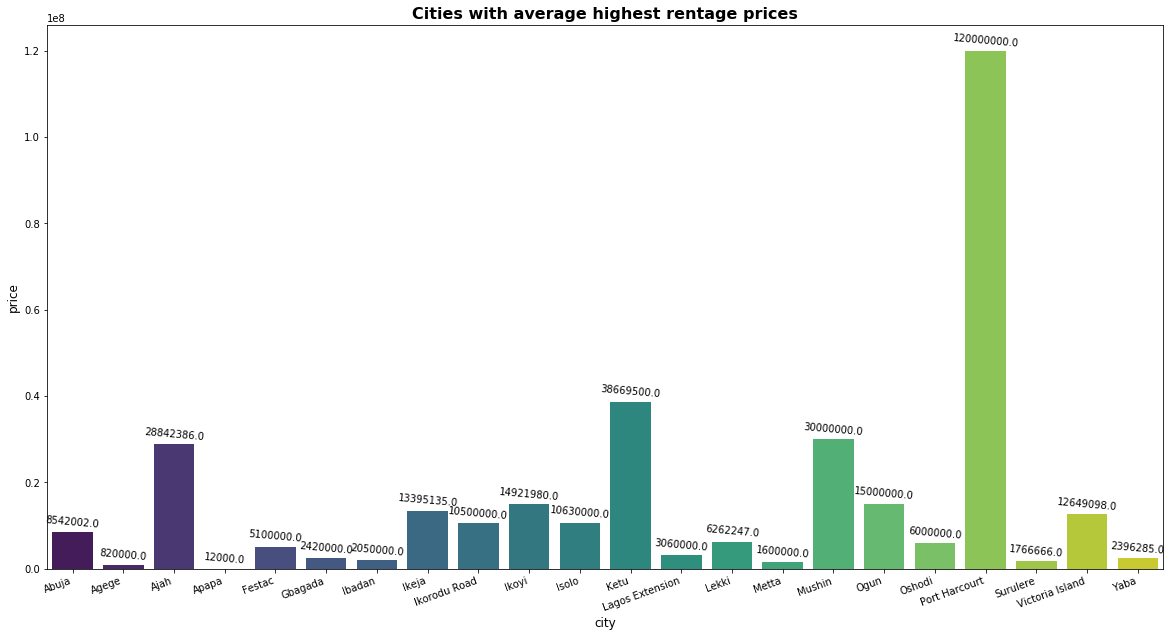

In [65]:
BarPlot2(city_avg_price, 'city', 'price', 'Cities with average highest rentage prices')

## Average Prices for Types of Buildings

In [66]:
type_avg_price = df.groupby('type')['price'].mean().astype('int').reset_index()

In [67]:
type_avg_price

,type,price
0,Apartment,11435842
1,Bungalow,3513333
2,Duplex,9475757
3,Hotel,49325000
4,House,15728720
5,Land,7500575
6,Office,17141340
7,Property,19770338
8,Quarter,1640000
9,Shop,5831158


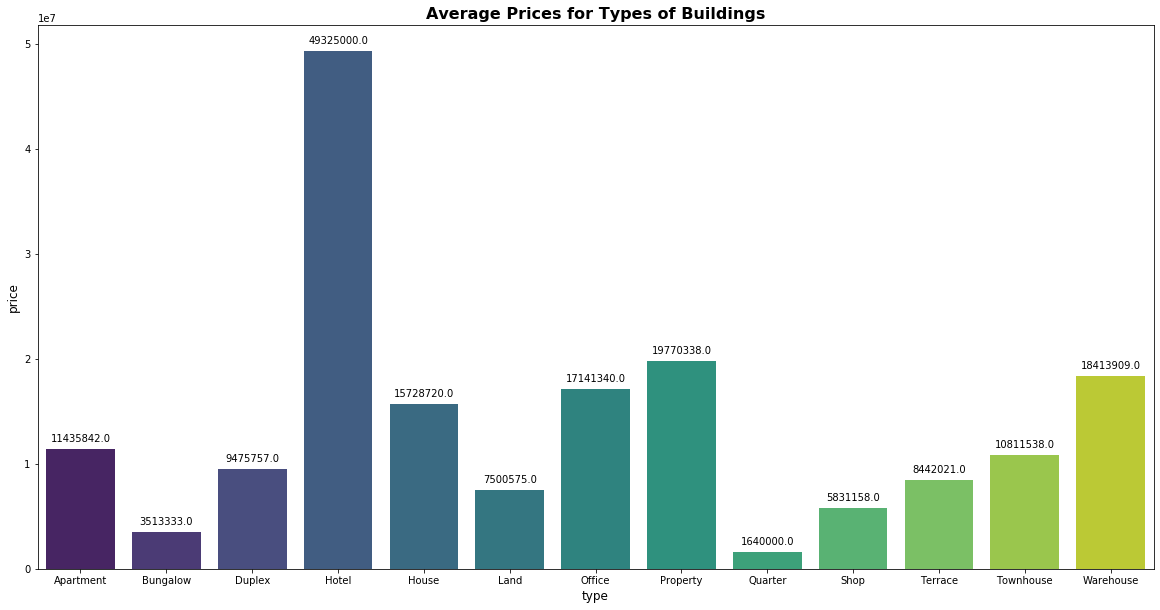

In [68]:
BarPlot(type_avg_price, 'type', 'price', 'Average Prices for Types of Buildings')

In [69]:
df['bedrooms'].unique()

array([  3,   5,   2,   4,   0,  44,   6,   1,   7,  12,  10,  19,  20,
        16, 400,   9,  15], dtype=int64)

In [70]:
df[df['bedrooms']==400]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
1384,56,Executive all rooms en-suite 4 bedrooms,400 Bedroom Duplex,400,4,0,"Sangotedo, Ajah",Ajah,2500000,Duplex


In [71]:
df['bedrooms'].replace(400,4,inplace=True)

In [72]:
df[df['bedrooms']>=8]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
45,2,4 bedroom semi detached duplex with a room bq,44 Bedroom Duplex,44,4,0,"Orchid, Ikota, Lekki",Lekki,4500000,Duplex
62,3,4 bedroom semi detached duplex with a room bq,44 Bedroom Duplex,44,4,0,"Orchid, Ikota, Lekki",Lekki,4500000,Duplex
173,7,Twelve (12) Bedroom House For Rent In Ibadan,12 Bedroom House,12,6,0,"Olubadan Estate, Iyaganku Gra, Ibadan",Ibadan,5000000,House
433,18,Direct Clients Only - Detached Property Suitab...,10 Bedroom House,10,10,8,"Off Alexander Road/ Bourdillon Road, Ikoyi",Ikoyi,40000000,House
668,27,"12 Bedroom Duplex Suitable For Guest House,Sch...",12 Bedroom Duplex,12,12,0,"Ogba, Ikeja",Ikeja,8000000,Duplex
859,35,Beautiful 3 Bedrooms Flat 4 Bedrooms and 5 Bed...,19 Bedroom Flat & Apartment,19,15,15,"Oniru Estate, Oniru, Victoria Island",Victoria Island,35000000,Apartment
1174,47,Waterfront Commercial Property,20 Bedroom Office,20,20,50,"Off, Awolowo Road, Ikoyi",Ikoyi,50000000,Office
1189,48,Commercial Property in Lekki Phase 1,16 Bedroom Office,16,20,0,"Off Admiralty Way, Lekki Phase 1, Lekki",Lekki,25000000,Office
1666,67,9 bedroom fully detached house with 4 living room,9 Bedroom Duplex,9,9,10,"Off Adeola Odeku , Victoria Island",Victoria Island,40000000,Duplex
1686,68,9 Bedroom Detached House For Sale,9 Bedroom Duplex,9,9,7,"Off Adeola Odeku,, Victoria Island",Victoria Island,40000000,Duplex


In [73]:
df[df['bedrooms']==0]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
20,1,&180 Square Meters Office In a High Rise Building,Office,0,0,0,"Churchgate Street , Victoria Island",Victoria Island,16500000,Office
22,1,Newly Built Commercial Building of 180 Square ...,Office,0,0,0,"Off Admiralty Way, Lekki Phase 1, Lekki",Lekki,11700000,Office
67,3,"Standard Warehouse Facility measuring 1,000sqm...",Commercial Property,0,0,0,Magboro Bus Stop Along Lagos Ibadan Express Wa...,Lagos Extension,14000000,Property
108,5,3 bays large warehouse facility measuring 3000...,Warehouse,0,0,0,"Wempco, Road, Ogba, Ikeja",Ikeja,60000000,Warehouse
416,17,Fully Furnished Duplex for Office at Lekki Pha...,Office,0,0,0,"Off Freedom Way, Lekki Phase 1, Lekki",Lekki,15000000,Office
...,...,...,...,...,...,...,...,...,...,...
2788,112,100 Square Meters Already Partitioned Office S...,Office,0,0,0,"Off Awolowo Way , Ikeja , Ikeja",Ikeja,1700000,Office
2789,112,185 Square Meter Open Plan Commercial Property,Office,0,0,0,"Off Ahmadu Bello Way, Victoria Island",Victoria Island,10175000,Office
2790,112,Grade A Office Space in Victoria Island - 200sqm,Office,0,0,0,Victoria Island,Victoria Island,40000000,Office
2809,113,Commercial building,Commercial Property,0,0,0,"Glover Road , Ikoyi",Ikoyi,70000000,Property


In [74]:
df[(df['bedrooms']==8) | (df['bedrooms']==9) | (df['bedrooms']==10) | (df['bedrooms']==12) | (df['bedrooms']==15)]

,page,description,title,bedrooms,bathrooms,garage,location,city,price,type
173,7,Twelve (12) Bedroom House For Rent In Ibadan,12 Bedroom House,12,6,0,"Olubadan Estate, Iyaganku Gra, Ibadan",Ibadan,5000000,House
433,18,Direct Clients Only - Detached Property Suitab...,10 Bedroom House,10,10,8,"Off Alexander Road/ Bourdillon Road, Ikoyi",Ikoyi,40000000,House
668,27,"12 Bedroom Duplex Suitable For Guest House,Sch...",12 Bedroom Duplex,12,12,0,"Ogba, Ikeja",Ikeja,8000000,Duplex
1666,67,9 bedroom fully detached house with 4 living room,9 Bedroom Duplex,9,9,10,"Off Adeola Odeku , Victoria Island",Victoria Island,40000000,Duplex
1686,68,9 Bedroom Detached House For Sale,9 Bedroom Duplex,9,9,7,"Off Adeola Odeku,, Victoria Island",Victoria Island,40000000,Duplex
1813,73,10 bedroom detached house,10 Bedroom Duplex,10,10,0,"At, Ikoyi",Ikoyi,30000000,Duplex
2574,103,5 units of 2 bedroom flat to let lekki phase one,15 Bedroom Flat & Apartment,15,15,0,"Durosimi Etti, Lekki Phase 1, Lekki",Lekki,35000000,Apartment


> - From the dataframe above, maximum number of bedrooms a standard apartment/Duplex/House in Nigeria should have is 15. 
> - And bedrooms that has zero are mostly, offices/warehouse/property.
> - To get a better understanding of the dataset and also narrow our search when looking for an apartment, we would only consider 1 bedroom to 7 bedroom for our analysis.

In [75]:
# Calculate avg price per number of bedrooms
beds_avg_price = df.groupby('bedrooms')['price'].mean().astype('int').reset_index()

In [76]:
# Dropping the following number of bedrooms
beds_avg_price.drop([0,8,9,10,11,12,13,14,15],axis=0,inplace=True)

In [77]:
beds_avg_price

,bedrooms,price
1,1,13288888
2,2,9270902
3,3,9123304
4,4,10039213
5,5,14909347
6,6,16734375
7,7,20000000


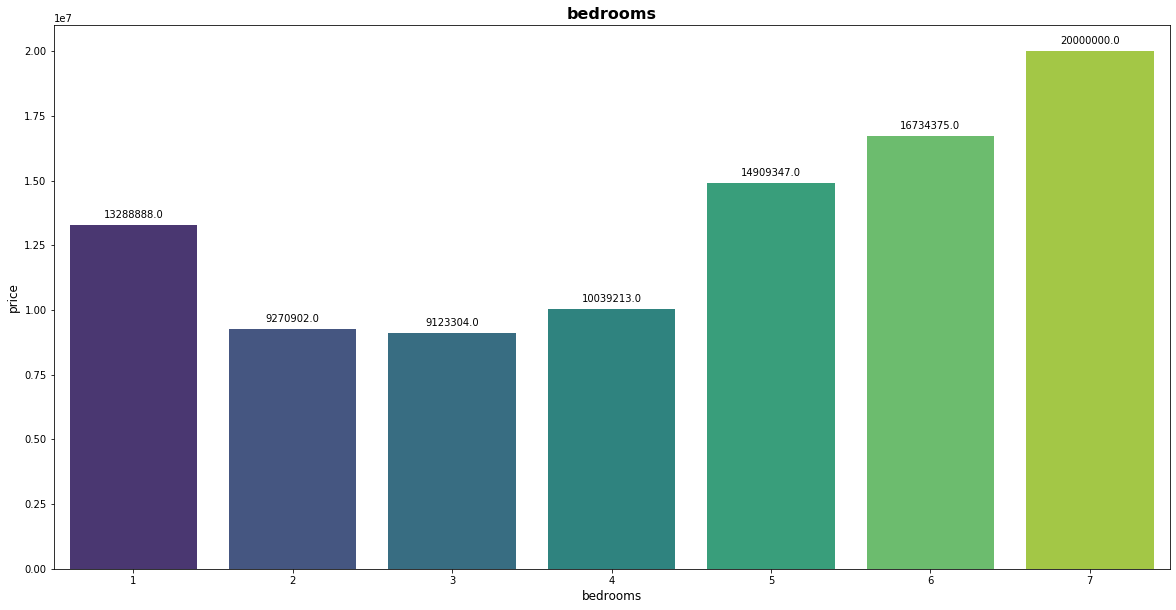

In [78]:
BarPlot(beds_avg_price,'bedrooms', 'price', 'bedrooms')

### Adebo Dolapo
#### 13/10/2021